## CMPINF 2100 Week 11
### Fit a linear model
Fit a linear model consisting of a SINGLE continuous INPUT that is LINEARLY RELATED to the TREND or MEAN OUTPUT.

This is your classic "best fit line".
## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

But we need one more module to FIT the linear model!

We will use `statsmodels` to FIT the linear models for regression. Later, we will use sklearn for fitting the linear model. But lets start with the `statsmodels` FORMULA API!!!

In [2]:
import statsmodels.formula.api as smf

In [3]:
%whos

Variable   Type      Data/Info
------------------------------
np         module    <module 'numpy' from '/Ap<...>kages/numpy/__init__.py'>
pd         module    <module 'pandas' from '/A<...>ages/pandas/__init__.py'>
plt        module    <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
smf        module    <module 'statsmodels.form<...>tsmodels/formula/api.py'>
sns        module    <module 'seaborn' from '/<...>ges/seaborn/__init__.py'>


## Read data

We will use the very simple linear relationship example that we created previously.

In [4]:
df = pd.read_csv("week_11_linear_data.csv")

In [5]:
df

,x,trend,y,true_intercept,true_slope,true_sigma
0,-3.00,4.750,6.030315,0.25,-1.5,1.25
1,-2.25,3.625,1.457911,0.25,-1.5,1.25
2,-1.50,2.500,2.388383,0.25,-1.5,1.25
3,-0.75,1.375,0.007815,0.25,-1.5,1.25
4,0.00,0.250,0.651244,0.25,-1.5,1.25
5,0.75,-0.875,-2.254007,0.25,-1.5,1.25
6,1.50,-2.000,-2.969992,0.25,-1.5,1.25
7,2.25,-3.125,-3.537097,0.25,-1.5,1.25
8,3.00,-4.250,-6.063282,0.25,-1.5,1.25


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   x               9 non-null      float64
 1   trend           9 non-null      float64
 2   y               9 non-null      float64
 3   true_intercept  9 non-null      float64
 4   true_slope      9 non-null      float64
 5   true_sigma      9 non-null      float64
dtypes: float64(6)
memory usage: 560.0 bytes


We will fit a LINEAR MODEL between the INPUT x and the OUTPUT y assuming a LINEAR RELATIONSHIP between the TREND and the INPUT.

## Fitting

The statsmodels function for fitting LINEAR MODELS for regression is smf.ols()

OLS stands for ordinary least squares, this will give us the estimate that minimize the sum of square error.

The smf.ols() function works slightly differently than how sklearn works. The object is INITIALIZED with a DATASET!!!

You then FIT the object with the .fit() method BUT the data has already been provided!!!

The model we want to FIT is specified via the formula argument to smf.ols().

The FORMULA is a STRING!!!

`'<OUTPUT> ~ <INPUT>'`

By default, the FORMULA assumes an INTERCEPT **MUST BE ESTIMATED**!!!

The resulting FITTED object will include all COEFFICIENT ESTIMATE, STANDARD ERRORS, CONFIDENCE INTERVALS, and most PERFORMANCE metrics.

In [68]:
lm_fit = smf.ols( formula='y ~ x', data=df).fit()

In [15]:
type(lm_fit)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [16]:
dir(lm_fit)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_get_wald_nonlinear',
 '_is_nested',
 '_transform_predict_exog',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_predi

The summary() is a useful METHOD for SUMMARIZING the linear model FIT!!!

In [18]:
lm_fit.summary()

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     78.82
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           4.66e-05
Time:                        21:14:53   Log-Likelihood:                -12.580
No. Observations:                   9   AIC:                             29.16
Df Residuals:                       7   BIC:                             29.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4765      0.370     -1.288      0.239      -1.352       0.398
x             -1.6964      0.191     -8.878      0.000      -2.148      -1.245
==============================================================================
Omnibus:                        0.301   Durbin-Watson:                   2.978
Prob(Omnibus):                  0.860   Jarque-Bera (JB):                0.330
Skew:                          -0.315   Prob(JB):                        0.848
Kurtosis:                       2.306   Cond. No.                         1.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Print the summary.

In [19]:
print(lm_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     78.82
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           4.66e-05
Time:                        21:17:11   Log-Likelihood:                -12.580
No. Observations:                   9   AIC:                             29.16
Df Residuals:                       7   BIC:                             29.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4765      0.370     -1.288      0.2

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


As a reminder, the FORUMLA `y ~ x` stands for:

$$\mu = \beta_0 + \beta_1 \times x $$

The params attributes stores the COEFFICIENTS ESTIMATES!! These are the estimates that MINIMIZE the sum of squared errors!!!

In [20]:
lm_fit.params

Intercept   -0.476523
x           -1.696400
dtype: float64

The standard error on the estimate is contained in the .bse attribute.

In [21]:
lm_fit.bse

Intercept    0.370031
x            0.191083
dtype: float64

Essentially, we can use the $\pm1$ and the $\pm2$ standard error intervals to know how TRUSTWORTHY the estimate is!!!

The most common standard error interval is the $\pm2$ standard error interval beause that is approximately equal to the 95% CONFIDENCE INTERVAL!!!

In [22]:
lm_fit.params - 2*lm_fit.bse

Intercept   -1.216585
x           -2.078566
dtype: float64

In [23]:
lm_fit.params + 2*lm_fit.bse

Intercept    0.263538
x           -1.314234
dtype: float64

The actual 95% confidence interval is a slightly more difficult formula. But when the sample size is high our approx using the Gaussian becomes really good. If you want the EXACT 95% confidence inteval then you can extract it using the .conf_int().

In [24]:
lm_fit.conf_int()

,0,1
Intercept,-1.351507,0.39846
x,-2.148239,-1.24456


Lets change the column names to the CONFIDENCE INTERVAL LOWER BOUND AND CONFIDENCE INTERVAL UPPER BOUND.

In [26]:
lm_fit.conf_int().\
rename(columns={0: "ci_lwr", 1: "ci_upr"})

,ci_lwr,ci_upr
Intercept,-1.351507,0.39846
x,-2.148239,-1.24456


I will extract the 95% confidence interval bounds and store the ESTIMATE with the STANDARD ERROR with the bounds.

In [27]:
coef_fit_info = lm_fit.conf_int().\
rename(columns={0: "ci_lwr", 1: "ci_upr"})

In [28]:
coef_fit_info

,ci_lwr,ci_upr
Intercept,-1.351507,0.39846
x,-2.148239,-1.24456


In [30]:
coef_fit_info["estimate"] = lm_fit.params

In [31]:
coef_fit_info["estimate_se"] = lm_fit.bse

In [32]:
coef_fit_info

,ci_lwr,ci_upr,estimate,estimate_se
Intercept,-1.351507,0.39846,-0.476523,0.370031
x,-2.148239,-1.24456,-1.696400,0.191083


In [34]:
coef_fit_info.index

Index(['Intercept', 'x'], dtype='object')

We can extract the p-values for the coefficients using the .pvalues attribute.

In [35]:
lm_fit.pvalues

Intercept    0.238754
x            0.000047
dtype: float64

The p-value is described as something really magical and important. It is used to identify **STATISTICALLY SIGNIFICANT** inputs.

A STATISTICALLY SIGNIFICANT input is one that has a p-value typically less than 0.05.

In [36]:
lm_fit.pvalues < 0.05

Intercept    False
x             True
dtype: bool

But the p-value is nothing magic or special in fact it can be completely described using a simple graphic!!!

Lets visualize the coefficient ESTIMATES as markers in a scatter plot and the CONFIDENCE INTERVALS as error bars.

We need to use the matplotlib axis object .errorbar() method to visualize the CI.

In [37]:
coef_fit_info

,ci_lwr,ci_upr,estimate,estimate_se
Intercept,-1.351507,0.39846,-0.476523,0.370031
x,-2.148239,-1.24456,-1.696400,0.191083


In [38]:
lm_fit.params

Intercept   -0.476523
x           -1.696400
dtype: float64

In [39]:
lm_fit.bse

Intercept    0.370031
x            0.191083
dtype: float64

In [40]:
lm_fit.conf_int()

,0,1
Intercept,-1.351507,0.39846
x,-2.148239,-1.24456


The errorbar() method wants us to provide the VALUE of the ERROR around the MARKER rather than the LIMITS of the INTERVAL. 

Therefore, I typically create the following **COEFFICIENT PLOT** vis using the approx based on 2 times the standard error.

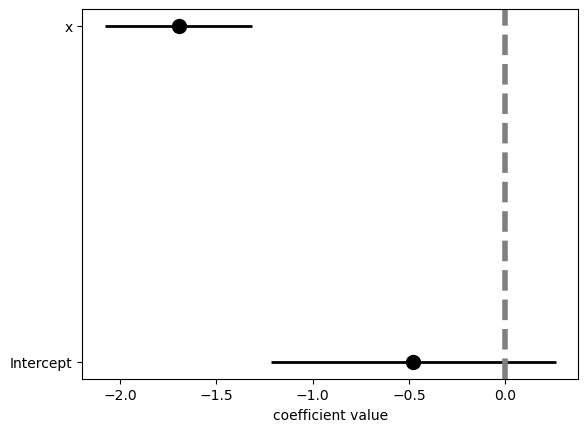

In [48]:
fig, ax = plt.subplots()

### use the errorbar method to show the estimates as markers and CI as errorbars
### create a HORIZONTAL errorbar
ax.errorbar(y = coef_fit_info.index,
           x = coef_fit_info.estimate,
           xerr = 2 * coef_fit_info.estimate_se, 
           fmt="o", color="k", ecolor="k", elinewidth=2, ms=10)

### Include vertical reference line at 0
ax.axvline(x=0, linestyle="--", linewidth=4, color="grey")

### set axis labels
ax.set_xlabel("coefficient value")

plt.show()

If the CI does not contain 0, we are confident in the sign!!

The confidence or trustworthiness of the SIGN(NEGATIVE or POSITIVE) of the SLOPE is typically expressed via the p-value.

In [49]:
lm_fit.pvalues

Intercept    0.238754
x            0.000047
dtype: float64

I will typically use the fitted statsmodels object directly to create the above figure.

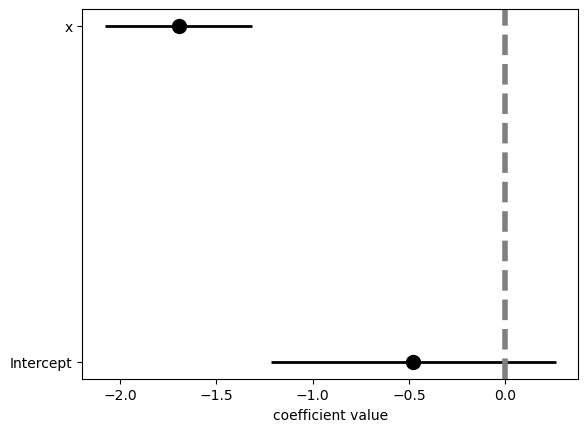

In [51]:
fig, ax = plt.subplots()

### use the errorbar method to show the estimates as markers and CI as errorbars
### create a HORIZONTAL errorbar
ax.errorbar(y = lm_fit.params.index,
           x = lm_fit.params,
           xerr = 2 * lm_fit.bse, 
           fmt="o", color="k", ecolor="k", elinewidth=2, ms=10)

### Include vertical reference line at 0
ax.axvline(x=0, linestyle="--", linewidth=4, color="grey")

### set axis labels
ax.set_xlabel("coefficient value")

plt.show()

However, if you want the EXACT 95% CI then we need to do some extra manipulation using the .conf_int() method.

In [52]:
lm_fit.conf_int()

,0,1
Intercept,-1.351507,0.39846
x,-2.148239,-1.24456


In [53]:
coef_fit_info

,ci_lwr,ci_upr,estimate,estimate_se
Intercept,-1.351507,0.39846,-0.476523,0.370031
x,-2.148239,-1.24456,-1.696400,0.191083


We need to calculated the lower change on the error bar and the upper change on the error bar around the average.

In [57]:
coef_fit_info["lwr_err"] = coef_fit_info.estimate - coef_fit_info.ci_lwr
coef_fit_info["upr_err"] = coef_fit_info.ci_upr - coef_fit_info.estimate

In [58]:
coef_fit_info

,ci_lwr,ci_upr,estimate,estimate_se,lwr_err,upr_err
Intercept,-1.351507,0.39846,-0.476523,0.370031,0.874984,0.874984
x,-2.148239,-1.24456,-1.696400,0.191083,0.451840,0.451840


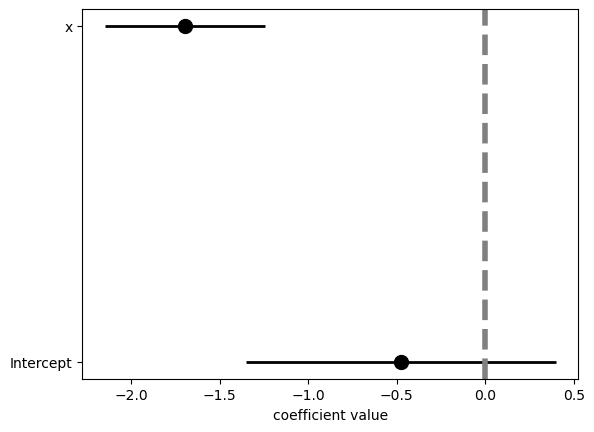

In [60]:
fig, ax = plt.subplots()

### use the errorbar method to show the estimates as markers and CI as errorbars
### create a HORIZONTAL errorbar
ax.errorbar(y = lm_fit.params.index,
           x = lm_fit.params,
           xerr = [coef_fit_info.lwr_err, coef_fit_info.upr_err], 
           fmt="o", color="k", ecolor="k", elinewidth=2, ms=10)

### Include vertical reference line at 0
ax.axvline(x=0, linestyle="--", linewidth=4, color="grey")

### set axis labels
ax.set_xlabel("coefficient value")

plt.show()

Lets compare our coefficients ESTIMATES to the TRUE coefficients that generated the data!!

In [61]:
df

,x,trend,y,true_intercept,true_slope,true_sigma
0,-3.00,4.750,6.030315,0.25,-1.5,1.25
1,-2.25,3.625,1.457911,0.25,-1.5,1.25
2,-1.50,2.500,2.388383,0.25,-1.5,1.25
3,-0.75,1.375,0.007815,0.25,-1.5,1.25
4,0.00,0.250,0.651244,0.25,-1.5,1.25
5,0.75,-0.875,-2.254007,0.25,-1.5,1.25
6,1.50,-2.000,-2.969992,0.25,-1.5,1.25
7,2.25,-3.125,-3.537097,0.25,-1.5,1.25
8,3.00,-4.250,-6.063282,0.25,-1.5,1.25


In [62]:
np.unique(df.true_intercept)

array([0.25])

In [63]:
np.unique(df.true_slope)

array([-1.5])

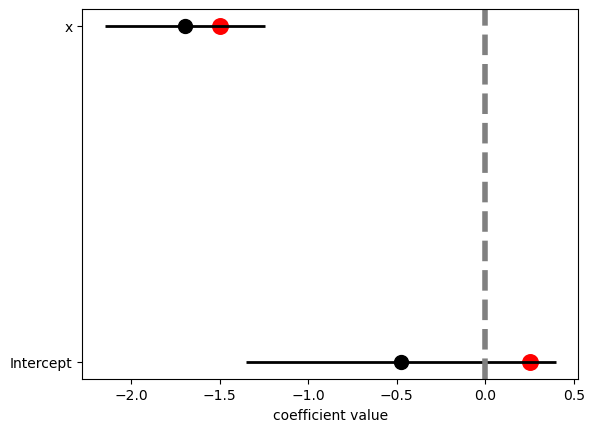

In [65]:
fig, ax = plt.subplots()

### use the errorbar method to show the estimates as markers and CI as errorbars
### create a HORIZONTAL errorbar
ax.errorbar(y = lm_fit.params.index,
           x = lm_fit.params,
           xerr = [coef_fit_info.lwr_err, coef_fit_info.upr_err], 
           fmt="o", color="k", ecolor="k", elinewidth=2, ms=10)

## Add in the true coefficients as markers that generated the data
ax.scatter(y=lm_fit.params.index,
           x=[np.unique(df.true_intercept), np.unique(df.true_slope)],
           color="red", s=125)

### Include vertical reference line at 0
ax.axvline(x=0, linestyle="--", linewidth=4, color="grey")

### set axis labels
ax.set_xlabel("coefficient value")

plt.show()